# Решающие деревья

https://stepik.org/lesson/223994/step/1?unit=196798

Entropy reduction - уменьшение энтропии, в попытке предикта переменной и учете фичи

Information gain - качество выбора решения фичи для уменьшения энторпии

Больше инфы: https://stepik.org/lesson/223994/step/9?unit=196798

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline 
# графики в том же окне
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [38]:
data = data.astype({'Шерстист': 'int32', 'Гавкает': 'int32', 'Лазает по деревьям': 'int32'})
data.dtypes

Шерстист               int32
Гавкает                int32
Лазает по деревьям     int32
Вид                   object
dtype: object

In [13]:
classificator = tree.DecisionTreeClassifier(criterion='entropy') # класс который опеределяет классифкатор решающего дерева

In [14]:
classificator

DecisionTreeClassifier(criterion='entropy')

In [15]:
X = data[['Шерстист', 'Гавкает', 'Лазает по деревьям']] # Feature
y = data['Вид'] # целевая переменная

In [28]:
result = classificator.fit(X, y) # обучить классификатор

[Text(167.4, 163.07999999999998, 'Лазает по деревьям <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

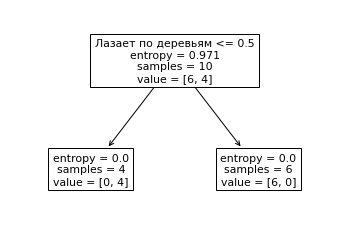

In [27]:
tree.plot_tree(result,feature_names=['Шерстист', 'Гавкает', 'Лазает по деревьям'])

## Посчитаем энтропию

https://stepik.org/lesson/223994/step/7?unit=196798

In [60]:
from scipy.stats import entropy

In [51]:
data.query('Шерстист < 0.5') # entropy([1/1], base=2) # из 1 не шерстистого 1 кот

,Шерстист,Гавкает,Лазает по деревьям,Вид
9,0,0,1,котик


In [90]:
data.query('Шерстист > 0.5') # entropy([1/1], base=2) # из 9 шерстистых 5 котов и 4 собаки

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик


In [107]:
entropy([4/9, 5/9], base=2)

0.9910760598382222

In [77]:
data.query('Гавкает > 0.5') # entropy([4/5, 1/5], base=2) # из 5 гавкающих 4 собаки и 1 кот

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
8,1,1,1,котик


In [78]:
data.query('Гавкает < 0.5') # entropy([5/5], base=2) # из 5 не гавкающих 5 котов

,Шерстист,Гавкает,Лазает по деревьям,Вид
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
9,0,0,1,котик


In [95]:
entropy([4/5, 1/5], base=2)

0.7219280948873623

In [102]:
entropy([4/10, 6/10], base=2) # базовая эннтропия 4 собаки, 6 котов

0.9709505944546688

In [103]:
"Information Gain - мера снижения интропии. Базовая энтропия = 1, если выборка равно распеределена (5 котов и 5 собак)"
def information_gein(size: int, left_size: int, left_entropy: float, right_size: int, right_entropy: float, base_entropy: float = 0.9709505944546688):
    return round((base_entropy - (left_size/size*left_entropy + right_size/size*right_entropy)), 2)

In [104]:
information_gein(size=10, left_size=1, left_entropy=0, right_size=9, right_entropy=0.9910760598382222) # Шерстист

0.08

In [105]:
information_gein(size=10, left_size=5, left_entropy=0, right_size=5, right_entropy=0.7219280948873623) # Гавкающий

0.61

In [106]:
information_gein(size=10, left_size=5, left_entropy=0, right_size=5, right_entropy=0) # Лазает по деревьям

0.97

## Построить Decision tree для датасета с ирисами. 

Целевой переменной при обучении является переменная species. 

https://stepik.org/lesson/209691/step/12?unit=183195

### Подлкючаем библиотеки

In [181]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score
from IPython.display import HTML
style = "<style>svg{width: 100% !important; height: 100% !important;} </style>"
HTML(style)

### Собираем и обрабатываем данные

In [110]:
df_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
df_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)

In [111]:
df_test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [112]:
df_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [116]:
# Готовим фичи. Удаляем ненужные столбцы и тот, который будем предсказывать
X_train = df_train.drop(['species'], axis=1)
X_test = df_test.drop(['species'], axis=1)

In [115]:
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


In [117]:
# Отбираем целевые переменныые для обучения
y_train = df_train['species']
y_test = df_test['species']

In [120]:
y_train.head()

130    2
7      0
11     0
142    2
109    2
Name: species, dtype: int64

### Обучение

In [146]:
rs = np.random.seed(0)

In [147]:
max_depth_values = range(1, 100)

In [185]:
scores_data = pd.DataFrame()

In [186]:
for max_depth in max_depth_values:
    cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    cls.fit(X_train, y_train)
    train_score = cls.score(X_train, y_train)
    test_score = cls.score(X_test, y_test)
    mean_cross_score = cross_val_score(cls, X_train, y_train, cv=5).mean()
    temp_df = pd.DataFrame({"max_depth": [max_depth], 
                            "train_score": [train_score], 
                            "test_score": [test_score], # [train score] - в квадратных скобках, т.к. пишем 1 значение
                            "mean_cross_score": [mean_cross_score]
                          })
    scores_data = scores_data.append(temp_df)

In [187]:
scores_data.head() # wide формат

,max_depth,train_score,test_score,mean_cross_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.94,0.96
0,5,1.00,0.94,0.96


### Визуализация

In [188]:
scores_data_long = pd.melt(scores_data,
                      id_vars=['max_depth'], # колонка для группировки
                      value_vars=['train_score', 'test_score', 'mean_cross_score'], # колонки для группировки по типу
                      value_name='score', # тип
                      var_name='type_score' # название колонки с типом
                     )

In [201]:
scores_data_long.query('type_score == "mean_cross_score" and max_depth < 10').sort_values('score', ascending=False) # на глубене дерева = 3 лучший результат

,max_depth,type_score,score
200,3,mean_cross_score,0.96
201,4,mean_cross_score,0.96
202,5,mean_cross_score,0.96
203,6,mean_cross_score,0.96
204,7,mean_cross_score,0.96
205,8,mean_cross_score,0.96
206,9,mean_cross_score,0.96
199,2,mean_cross_score,0.95
198,1,mean_cross_score,0.70


In [191]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plt.rcParams["xtick.labelsize"] = 7 # размер надписей по оси х

<AxesSubplot:xlabel='max_depth', ylabel='score'>

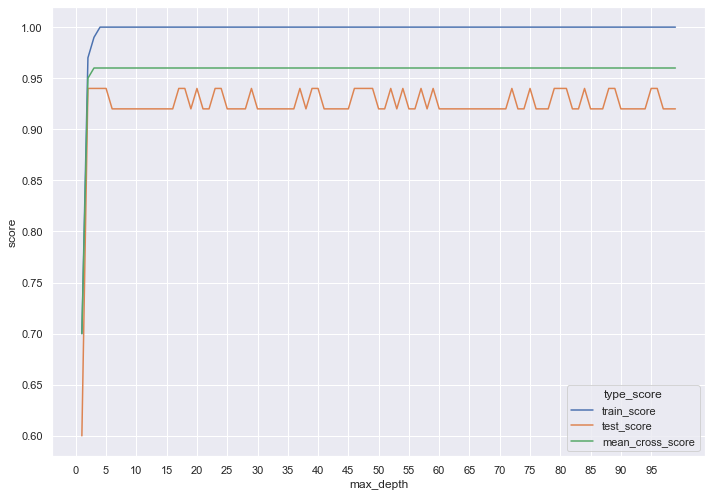

In [192]:
plot = sns.lineplot(y='score', x='max_depth', hue='type_score', data=scores_data_long)
plot.xaxis.set_ticks(range(0,100,5)) # изменить масштаб оси х и выставить свои значения х
plot

#### График означает, что если глубина (max_depth)

- < 2, дерево **недообучено**,
- \> 4, дерево **переобучается** и хуже работает на тестовой выборке

Переобучение в данном случае значит, что дерево стремится не только найти **общие закономерности**, но у учесть все частные случаи тренировочного сета. И т.к. в тестовом сете может небыть этих частных случаев - **аккуратность (accuracy_score)** алгоритма ухудшается.

Кроме того, т.к. проверяем качество на одном и том же тестовом наборе данных, мы выбираем модель с наилучшей точностью именно для этого тестового набора данных. На дугом тестовом наборе модель может работать хуже. В идеале, нужно показывать 1 модели тестовый набор данных только 1 раз.

https://stepik.org/lesson/209691/step/8?unit=183195

#### Тестовое задание

https://stepik.org/lesson/209691/step/15?unit=183195

##### Получаем данные

In [209]:
cat_doc_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [210]:
cat_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               1000 non-null   int64  
 1   Высота              1000 non-null   float64
 2   Шерстист            1000 non-null   int64  
 3   Гавкает             1000 non-null   int64  
 4   Лазает по деревьям  1000 non-null   int64  
 5   Вид                 1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


##### Готовим фичи. Разбиваем данные на train и test сеты

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X = cat_doc_df.drop(['Вид'], axis=1)
y = cat_doc_df['Вид']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Обучаем

In [214]:
cat_doc_scores_data = pd.DataFrame()

In [215]:
for max_depth in max_depth_values:
    cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    cls.fit(X_train, y_train)
    train_score = cls.score(X_train, y_train)
    test_score = cls.score(X_test, y_test)
    mean_cross_score = cross_val_score(cls, X_train, y_train, cv=5).mean()
    temp_df = pd.DataFrame({"max_depth": [max_depth], 
                            "train_score": [train_score], 
                            "test_score": [test_score], # [train score] - в квадратных скобках, т.к. пишем 1 значение
                            "mean_cross_score": [mean_cross_score]
                          })
    scores_data = scores_data.append(temp_df)

In [216]:
cat_doc_scores_data_long = pd.melt(scores_data,
                      id_vars=['max_depth'], # колонка для группировки
                      value_vars=['train_score', 'test_score', 'mean_cross_score'], # колонки для группировки по типу
                      value_name='score', # тип
                      var_name='type_score' # название колонки с типом
                     )

In [217]:
cat_doc_scores_data_long.query('type_score == "mean_cross_score" and max_depth < 10').sort_values('score', ascending=False) # на глубене дерева = 2 лучший результат

,max_depth,type_score,score
495,1,mean_cross_score,1.00
496,2,mean_cross_score,1.00
502,8,mean_cross_score,1.00
501,7,mean_cross_score,1.00
500,6,mean_cross_score,1.00
499,5,mean_cross_score,1.00
498,4,mean_cross_score,1.00
497,3,mean_cross_score,1.00
503,9,mean_cross_score,1.00
404,9,mean_cross_score,0.96


In [218]:
best_cat_doc_cls = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=rs)

In [221]:
cross_score = cross_val_score(cls, X_train, y_train, cv=5).mean()
cross_score

1.0

In [226]:
best_cat_doc_cls.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [233]:
X_test = pd.read_json('C:\\Users\\al-gry\\Downloads\\dataset_209691_15.txt')

In [234]:
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,18,21.6,1,1,0
1,31,37.2,1,1,0
2,22,26.4,1,1,0
3,22,26.4,1,1,0
4,17,20.4,1,1,0


##### Предсказываем

In [235]:
result = pd.Series(best_cat_doc_cls.predict(X_test))

In [236]:
result[result == 'собачка'].count()

46